In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import collections
from collections import namedtuple
import builtins
import math
# import our library as is now
sys.path.insert(0, '../resurfemg')
import helper_functions as hf
import converter_functions as cf
from config import Config

config = Config()


C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
C:\Users\makeda\anaconda3\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


In [2]:
# get new changes in our library i.e. the tmsisdk
import sys
sys.path.insert(0, '../resurfemg')

from tmsisdk_lite import Poly5Reader

In [3]:
root_emg_directory = config.get_directory('root_emg_directory')

In [4]:
new_emg_different = 'C:/Projects/20180523_225654.Data8Raw.Poly5'

In [5]:

 
# what is inside duiverman emg
# 1 Int: EMG of intercostal muscles
# 2 F dia: EMG of frontal diaphragm
# 3 D dia: EMG of dorsal diaphragm
# 4 Abd: EMG of abdominal muscles (not always recorded)
# 5 VAR: no idea.. I have to look that up. Looking at the other arrays, it may be the EMG of the right diaphragm. Can you look at the data? Is it an EMG channel?
# 6 L Dia: EMG of left diaphragm
# 7 RMS int: root mean square of intercostal muscles (so filtered)
# 8 RMS F dia: root mean square of frontal diaphragm (so filtered)
# 9 RMS D dia: root mean square of dorsal diaphragm (so filtered)
# 10 RMS abd: root mean square of abdominal diaphragm (so filtered)
# 11 RMS R dia: root mean square of right diaphragm (so filtered)
# 12 RMS L dia: root mean square of left diaphragm (so filtered)
# 13 Paw: airway pressure (not always recorded)
# 14 Pes: esophageal pressure (not always recorded)
# 15 Pga: gastric pressure (not always recorded)
# 16 RR: respiratory rate I guess (very unreliable)
# 17 HR: heart rate (very unreliable)
# 18 Tach: number of breath I gues (also very unreliable)
 

In [6]:
data_emg = Poly5Reader(new_emg_different)
#data_emg = Poly5Reader(our_sample)
data_samples = data_emg.samples
emg_fs = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_fs)
    converted_to_samples.append(i)
data_samples = data_emg.samples
emg_fs = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_fs)
    converted_to_samples.append(i)

Reading file  C:/Projects/20180523_225654.Data8Raw.Poly5
	 Number of samples:  10175502 
	 Number of channels:  18 
	 Sample rate: 500 Hz
Done reading data.


In [7]:
data_samples.shape

(18, 10175502)

In [8]:
def poly_duiverman(duiverman_poly5_file): 
    """
    This is a function to read in Duiverman type Poly5 files,
    which has 18 layers
    and return an array of the 12  unprocessed leads
    for further pre-processing
    """
    data_emg = Poly5Reader(duiverman_poly5_file)
    samps = np.vstack([data_samples[:6],data_samples[12:]])
    return samps


In [9]:
poly_duiverman(new_emg_different)

Reading file  C:/Projects/20180523_225654.Data8Raw.Poly5
	 Number of samples:  10175502 
	 Number of channels:  18 
	 Sample rate: 500 Hz
Done reading data.


array([[-3.89819169, -5.61415386, -3.80954814, ...,  0.        ,
         0.        ,  0.        ],
       [-3.64805627,  5.31452036, 13.85493565, ...,  0.        ,
         0.        ,  0.        ],
       [10.73729706,  2.730896  , -7.74936914, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [39.23068619, 39.23561096, 39.24053192, ...,  0.        ,
         0.        ,  0.        ],
       [89.91201019, 89.91389465, 89.91577911, ...,  0.        ,
         0.        ,  0.        ],
       [98.        , 98.        , 98.        , ...,  0.        ,
         0.        ,  0.        ]])

In [10]:
newnow= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_13808\1367814705.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  newnow= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')


In [11]:
newnow.tail(5)

,Time,Events,RMS Int [uV],RMS F Dia [uV],RMS D Dia [uV],RMS Abd [uV],RMS R Dia [uV],RMS L Dia [uV],Paw [mB],Pes [mB],Pga [mB]
1017531,5:39:10.680,NaN,21.080,30.873,13.892,10.627,14.831,14.831,-2.462,0.380,0.331
1017532,5:39:10.700,NaN,20.826,29.963,13.422,10.404,14.813,14.813,-2.456,0.381,0.335
1017533,5:39:10.720,NaN,20.614,28.946,12.948,10.144,14.732,14.732,-2.450,0.386,0.338
1017534,5:39:10.740,NaN,20.436,27.839,12.492,9.850,14.586,14.586,-2.451,0.385,0.339
1017535,5:39:10.760,NaN,20.271,26.659,12.057,9.527,14.380,14.380,-2.453,0.384,0.341


In [12]:
def dvrmn_csv_freq_find(file_name):
    file = pd.read_csv(file_name)
    sample_points = len(file)
    time_string = file['Time'][sample_points -1]
    seconds = float(time_string[5:10])
    minutes = float(time_string[2:4])
    hours =  int(time_string[0:1])
    sum_time = (hours*3600) + (minutes*60) + seconds 
    freq = round(sample_points/sum_time)
    return freq # 10175

In [13]:
dvrmn_csv_freq_find('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_13808\983619166.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(file_name)


50

In [14]:
def dvrmn_csv_to_array(file_name):
    """
    This transformed an already preprocessed csv from the Duiverman lab into an EMG
    in the format our other functions can work on it. 
    """
    file = pd.read_csv(file_name)
    new_df = file.drop(['Events', 'Time'], axis =1)
    arrayed = np.rot90(new_df)
    arrayed = np.flipud(arrayed)
    return arrayed


In [15]:
dvrmn_csv_to_array('C:/Projects/20180523_225654.DataPF.csv')

C:\Users\makeda\AppData\Local\Temp\ipykernel_13808\2972198589.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  file = pd.read_csv(file_name)


array([[ 4.0140e+00,  4.0590e+00,  4.1170e+00, ...,  2.0614e+01,
         2.0436e+01,  2.0271e+01],
       [ 8.5080e+00,  7.9160e+00,  7.3790e+00, ...,  2.8946e+01,
         2.7839e+01,  2.6659e+01],
       [ 3.5780e+00,  3.3760e+00,  3.1840e+00, ...,  1.2948e+01,
         1.2492e+01,  1.2057e+01],
       ...,
       [-1.0000e-03,  3.0000e-03,  4.0000e-03, ..., -2.4500e+00,
        -2.4510e+00, -2.4530e+00],
       [-1.2000e-02, -6.0000e-03, -5.0000e-03, ...,  3.8600e-01,
         3.8500e-01,  3.8400e-01],
       [ 8.0000e-03,  1.5000e-02,  1.4000e-02, ...,  3.3800e-01,
         3.3900e-01,  3.4100e-01]])

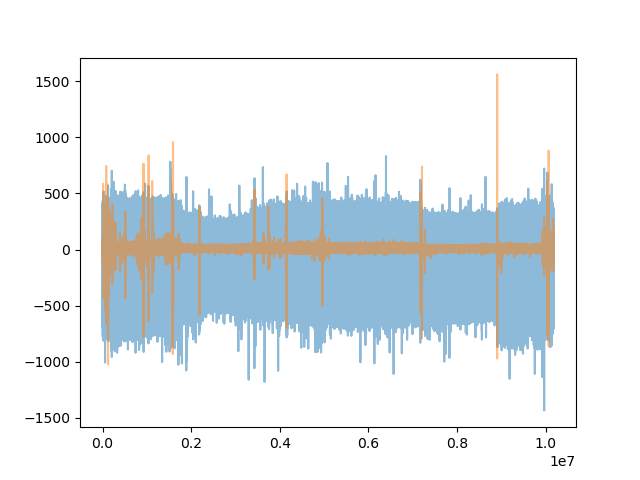

In [16]:
plt.plot(data_samples[1], alpha = 0.5)
plt.plot(data_samples[0], alpha = 0.5)

In [17]:
plt.plot(data_samples[2], alpha = 0.5)
plt.plot(data_samples[3], alpha = 0.5)

In [18]:
plt.plot(data_samples[10], alpha = 0.5)
plt.plot(data_samples[11], alpha = 0.5)

In [19]:
plt.plot(data_samples[13], alpha = 0.5)
plt.plot(data_samples[14], alpha = 0.5)

In [20]:
plt.plot(data_samples[15], alpha = 0.5)
plt.plot(data_samples[16], alpha = 0.5)

In [21]:
plt.plot(data_samples[17], alpha = 0.5)
plt.plot(data_samples[16], alpha = 0.5)

In [22]:
newnow.head(10)

,Time,Events,RMS Int [uV],RMS F Dia [uV],RMS D Dia [uV],RMS Abd [uV],RMS R Dia [uV],RMS L Dia [uV],Paw [mB],Pes [mB],Pga [mB]
0,0:00:00.060,22:56:54,4.014,8.508,3.578,2.783,7.867,7.867,-0.001,-0.012,0.008
1,0:00:00.080,NaN,4.059,7.916,3.376,2.602,7.487,7.487,0.003,-0.006,0.015
2,0:00:00.100,NaN,4.117,7.379,3.184,2.449,7.103,7.103,0.004,-0.005,0.014
3,0:00:00.120,NaN,4.188,6.894,3.006,2.322,6.723,6.723,0.006,-0.004,0.015
4,0:00:00.140,NaN,4.272,6.453,2.842,2.223,6.347,6.347,0.002,-0.008,0.007
5,0:00:00.160,NaN,4.367,6.054,2.695,2.150,5.974,5.974,0.001,-0.010,0.003
6,0:00:00.180,NaN,4.466,5.701,2.566,2.100,5.614,5.614,0.001,-0.008,0.002
7,0:00:00.200,NaN,4.563,5.401,2.458,2.072,5.279,5.279,0.004,-0.004,0.003
8,0:00:00.220,NaN,4.654,5.146,2.376,2.061,4.977,4.977,0.008,0.000,0.004
9,0:00:00.240,NaN,4.737,4.921,2.318,2.060,4.703,4.703,0.011,0.004,0.005


In [23]:
accomanycsv.shape[0]

NameError: name 'accomanycsv' is not defined

In [ ]:
data_emg.channels

In [ ]:
data_emg.samples

In [ ]:
%matplotlib inline
# set up plotn
x = data_samples
fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
#ax.set_ylim([-4, 4d])
axis[0].grid(True)
axis[0].plot(x[0])
axis[0].set(title='leads in samples')
axis[1].plot(x[1])
axis[2].plot(x[2])
axis[3].plot(x[3])
axis[4].plot(x[4])

# axis[5].plot(x[5])
# axis[6].plot(x[6])
# axis[7].plot(x[7])
# axis[8].plot(x[8])
# axis[9].plot(x[9])
# axis[10].plot(x[10])

# axis[11].plot(x[11])
# axis[12].plot(x[12])
# axis[13].plot(x[13])
# axis[14].plot(x[14])
# axis[15].plot(x[15])

# axis[16].plot(x[16])
# axis[17].plot(x[17])

plt.show()


In [ ]:
accomanycsv= pd.read_csv('C:/Projects/20180523_225654.DataPF.csv')

In [ ]:
accomanycsv.head(5)

In [ ]:
accomanycsv.shape

In [ ]:
data_samples.shape

In [ ]:
converted = pd.DataFrame(data = data_samples)

In [ ]:
converted.head(15)

In [ ]:
import scipy
#C:\Projects
import scipy.io as sio

In [ ]:
file_name = 'C://Projects/data_sEMG_test.mat'
file =sio.loadmat(file_name, mdict=None, appendmat=True)

In [ ]:
#file

In [ ]:
file.keys()

In [ ]:
#file.values()

In [ ]:
file['__header__']

In [ ]:
file['__version__']

In [ ]:
file['__globals__']

In [ ]:
file['data_emg']

In [ ]:
file['data_emg'].shape

In [ ]:
file['data_emg'][:, 0]

we have the info that it was run at 2000 hertz for 100 seconds, 5 leads, note this file type does not seem to record the frequency of sampling

In [ ]:
# %matplotlib inline
# # set up plotn
# x = file['data_emg'] # data_samples
# fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
# #ax.set_ylim([-4, 4d])
# axis[0].grid(True)
# axis[0].plot(x[:, 0])
# axis[0].set(title='leads in samples')
# axis[1].plot(x[:,1])
# axis[2].plot(x[:,2])
# axis[3].plot(x[:,3])
# axis[4].plot(x[:,4])


OK, so now the question is to write something generalizable so we can have 3,5,or even 18 leads...

In [ ]:
def working_pipeline_pre_entropy(our_chosen_samples): 
    cut_file_data = hf.bad_end_cutter_for_samples(our_chosen_samples, percent_to_cut=3, tolerance_percent=5)
    bd_filtered_file_data = hf.emg_bandpass_butter_sample(cut_file_data, 5, 450, 2048, output='sos')
    # step 3 end-cutting again to get rid of filtering artifacts
    re_cut_file_data = hf.bad_end_cutter_for_samples(bd_filtered_file_data, percent_to_cut=3, tolerance_percent=5)
    # skip step4 and do step 5 ICA
    components = hf.compute_ICA_two_comp(re_cut_file_data)
    #     the picking step!
    emg= hf.pick_more_peaks_array(components)
    # now process it in final steps
    abs_values = abs(emg)
    final_envelope_d = hf.emg_highpass_butter(abs_values, 150, 2048)
    
        
    return final_envelope_d

In [ ]:
cut_file_data = hf.bad_end_cutter_for_samples(file['data_emg'], percent_to_cut=3, tolerance_percent=5)

In [ ]:
cut_file_data.shape

The above did not work- it cuts the last lead. Maybe we need tomchange the shape with a roll, lets compare to our typical file

In [ ]:
typical_file_chosen = '../not_pushed/topspin_data_anonymized/M001/001/EMG_recording.Poly5'

In [ ]:
data_emg = Poly5Reader(typical_file_chosen)
data_samples= data_emg.samples
emg_fs = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_fs)
    converted_to_samples.append(i)

In [ ]:
data_samples.shape

In [ ]:
file['data_emg'].shape

There we go, we must resolve this so we get the same shaped array before we process it.

In [ ]:
def matlab5_jkmn_to_array(file_name):
    file =sio.loadmat(file_name, mdict=None, appendmat=False)
    arrays = np.rot90(file['data_emg'])
    return arrays

In [ ]:
output = cf.matlab5_jkmn_to_array(file_name)

In [ ]:
output

In [ ]:
def csv_from_jkmn_to_array(file_name):
    file = pd.read_csv(file_name)
    new_df = (file.T.reset_index().T.reset_index(drop=True)
            .set_axis([f'lead.{i+1}' for i in range(file.shape[1])], axis=1))

    arrayed = np.rot90(new_df)
    output_copy = arrayed.copy()
    arrayed[4] = output_copy[0]
    arrayed[3] = output_copy[1]
    arrayed[1] = output_copy[3]
    arrayed[0] = output_copy[4]
    return arrayed

In [ ]:
file_name2= 'C:/Projects/ReSurfEMG/open_work/hidden/data_sEMG_test.csv'
output2 = csv_from_jkmn_to_array(file_name2)

In [ ]:
print(type(output[0][12]))

In [ ]:
print(type(output3[0][5]))

In [ ]:
#plt.plot(output[0])
output3 = np.array(output2).astype('float64')
plt.plot(output3[0]- output[0])

In [ ]:
output[0] - output3[0]

In [ ]:
output[:,:1000]

In [ ]:
%matplotlib inline
# set up plotn
x = output[:,:20000]# data_samples
fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
#ax.set_ylim([-4, 4d])
axis[0].grid(True)
axis[0].plot(x[0])
axis[0].set(title='leads in samples')
axis[1].plot(x[1])
axis[2].plot(x[2])
axis[3].plot(x[3])
axis[4].plot(x[4])

In [ ]:
# %matplotlib inline
# # set up plotn
# x = output # data_samples
# fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
# #ax.set_ylim([-4, 4d])
# axis[0].grid(True)
# axis[0].plot(x[0])
# axis[0].set(title='leads in samples')
# axis[1].plot(x[1])
# axis[2].plot(x[2])
# axis[3].plot(x[3])
# axis[4].plot(x[4])

In [ ]:
# output_copy= output.copy()
# #output_copy
# output[4] = output_copy[0]
# output[3] = output_copy[1]
# output[1] = output_copy[3]
# output[0] = output_copy[4]
# x = output # data_samples
# fig, axis = plt.subplots(nrows = 5, ncols = 1, figsize=(8, 8))
# #ax.set_ylim([-4, 4d])
# axis[0].grid(True)
# axis[0].plot(x[0])
# axis[0].set(title='leads in samples')
# axis[1].plot(x[1])
# axis[2].plot(x[2])
# axis[3].plot(x[3])
# axis[4].plot(x[4])

In [ ]:
list(range(output.shape[0]))

In [ ]:

def compute_ICA_two_comp(emg_samples):
    """A function that performs an independant component analysis
    (ICA) meant for EMG data that includes stacked three arrays.

    :param emg_samples: Original signal array with three layers
    :type emg_samples: ~numpy.ndarray

    :returns: Two arrays of independent components (ECG-like and EMG)
    :rtype: ~numpy.ndarray
    """
    print(emg_samples[0])
    X = np.c_[emg_samples[0], emg_samples[2]]
    print(X)
    ica = FastICA(n_components=2)
    S = ica.fit_transform(X)
    component_0 = S.T[0]
    component_1 = S.T[1]
    return component_0, component_1


In [ ]:
hoho = compute_ICA_two_comp(output)
hoho

In [ ]:
from sklearn.decomposition import FastICA
def compute_ICA_two_comp_selective(emg_samples, use_all_leads=True, desired_leads=[0,2]):
    """A function that performs an independant component analysis
    (ICA) meant for EMG data that includes stacked arrays,
    there should be at least 3 arrays but there can be more.

    :param emg_samples: Original signal array with three or more layers
    :type emg_samples: ~numpy.ndarray

    :returns: Two arrays of independent components (ECG-like and EMG)
    :rtype: ~numpy.ndarray
    """
    if use_all_leads == True:
        all_component_numbers = list(range(emg_samples.shape[0]))
    else:
        all_component_numbers = desired_leads
    list_to_c = []
    for i in all_component_numbers:
        print(i)
        list_to_c.append(emg_samples[i])
    #print( list_to_c)    
    X = np.column_stack(list_to_c)
    #print(X)
    
    ica = FastICA(n_components=2)
    S = ica.fit_transform(X)
    component_0 = S.T[0]
    component_1 = S.T[1]
    return component_0, component_1

In [ ]:
output.shape

In [ ]:
hulu = compute_ICA_two_comp_new(output, use_all_leads=False,desired_leads=[1,3] )

In [ ]:
i= 10
if i not in [1,2,3]:
    print(i)

In [ ]:
a = np.array((1,2,3))

b = np.array((2,3,4))
c = np.array((2,6,4))

np.column_stack((a,b,c))

In [ ]:
# %matplotlib inline
# # set up plotn
# x = hulu # data_samples
# fig, axis = plt.subplots(nrows = 2, ncols = 1, figsize=(8, 8))
# #ax.set_ylim([-4, 4d])
# axis[0].grid(True)
# axis[0].plot(x[0])
# axis[0].set(title='leads in samples')
# axis[1].plot(x[1])